# Keras Sample

In [2]:
from preProcess import *
import keras
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPooling2D
from tensorflow.keras.utils import to_categorical
from IPython import display
import matplotlib.pyplot as plt
import tensorflow as tf

In [3]:

# Second dimension of the feature is dim2
feature_dim_2 = 11

# Save data to array file first
save_data_to_array(max_len=feature_dim_2)

# # Loading train set and test set
X_train, X_test, y_train, y_test = get_train_test()

# # Feature dimension
feature_dim_1 = 20
channel = 1
epochs = 50
batch_size = 100
verbose = 1
num_classes = 3

# Reshaping to perform 2D convolution
X_train = X_train.reshape(X_train.shape[0], feature_dim_1, feature_dim_2, channel)
X_test = X_test.reshape(X_test.shape[0], feature_dim_1, feature_dim_2, channel)

y_train_hot = to_categorical(y_train)
y_test_hot = to_categorical(y_test)

Saving vectors of label - 'happy': 100%|██████████| 1742/1742 [00:20<00:00, 85.04it/s]


In [4]:
def get_model():
    model = Sequential()
    model.add(Conv2D(32, kernel_size=(2, 2), activation='relu', input_shape=(feature_dim_1, feature_dim_2, channel)))
    model.add(Conv2D(48, kernel_size=(2, 2), activation='relu'))
    model.add(Conv2D(120, kernel_size=(2, 2), activation='relu'))
    model.add(MaxPooling2D(pool_size=(2, 2)))
    model.add(Dropout(0.25))  
    model.add(Flatten())
    model.add(Dense(128, activation='relu'))
    model.add(Dropout(0.25))
    model.add(Dense(64, activation='relu'))
    model.add(Dropout(0.4))
    model.add(Dense(num_classes, activation='softmax'))
    model.compile(loss=tf.keras.losses.categorical_crossentropy,
                  optimizer=tf.keras.optimizers.Adadelta(),
                  metrics=['accuracy'])
    return model

# Predicts one sample
def predict(filepath, model):
    sample = wav2mfcc(filepath)
    sample_reshaped = sample.reshape(1, feature_dim_1, feature_dim_2, channel)
    return get_labels()[0][
            np.argmax(model.predict(sample_reshaped))
    ]

In [5]:
model = get_model()
history = model.fit(X_train, y_train_hot, batch_size=batch_size, epochs=epochs, verbose=verbose, validation_data=(X_test, y_test_hot))

Epoch 1/50
32/32 [==============================] - 6s 127ms/step - loss: 5.5522 - accuracy: 0.3364 - val_loss: 1.8820 - val_accuracy: 0.3512
Epoch 2/50
32/32 [==============================] - 3s 101ms/step - loss: 5.5414 - accuracy: 0.3284 - val_loss: 1.7831 - val_accuracy: 0.3540
Epoch 3/50
32/32 [==============================] - 3s 96ms/step - loss: 5.2840 - accuracy: 0.3467 - val_loss: 1.7133 - val_accuracy: 0.3545
Epoch 4/50
32/32 [==============================] - 3s 101ms/step - loss: 4.9489 - accuracy: 0.3499 - val_loss: 1.6485 - val_accuracy: 0.3531
Epoch 5/50
32/32 [==============================] - 3s 100ms/step - loss: 4.9488 - accuracy: 0.3313 - val_loss: 1.5997 - val_accuracy: 0.3507
Epoch 6/50
32/32 [==============================] - 3s 98ms/step - loss: 4.8350 - accuracy: 0.3329 - val_loss: 1.5610 - val_accuracy: 0.3589
Epoch 7/50
32/32 [==============================] - 3s 102ms/step - loss: 4.6881 - accuracy: 0.3262 - val_loss: 1.5211 - val_accuracy: 0.3569
Epoch 8/

Text(0, 0.5, 'Accuracy [%]')

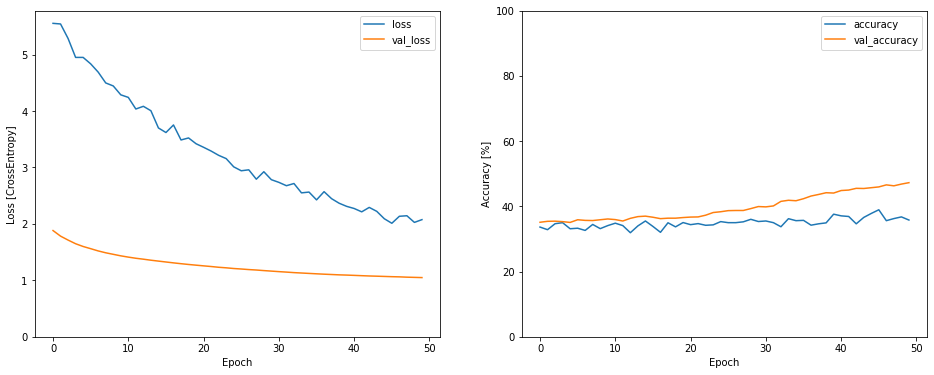

In [6]:
metrics = history.history
plt.figure(figsize=(16,6))
plt.subplot(1,2,1)
plt.plot(history.epoch, metrics['loss'], metrics['val_loss'])
plt.legend(['loss', 'val_loss'])
plt.ylim([0, max(plt.ylim())])
plt.xlabel('Epoch')
plt.ylabel('Loss [CrossEntropy]')

plt.subplot(1,2,2)
plt.plot(history.epoch, 100*np.array(metrics['accuracy']), 100*np.array(metrics['val_accuracy']))
plt.legend(['accuracy', 'val_accuracy'])
plt.ylim([0, 100])
plt.xlabel('Epoch')
plt.ylabel('Accuracy [%]')

In [7]:
predictTest = predict('./data/bed/00176480_nohash_0.wav', model=model)
print(f'We got::: {predictTest}')

We got::: bed


prediction: [[0.50749207 0.29915097 0.193357  ]]


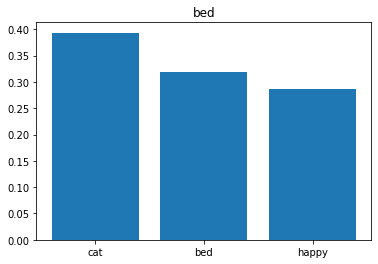

In [8]:
commands = ['cat','bed', 'happy']
pathFile = './data/bed/00176480_nohash_0.wav'
sample = wav2mfcc(pathFile)


x = tf.io.read_file(str(pathFile))
x, sample_rate = tf.audio.decode_wav(x, desired_channels=1, desired_samples=16000,)
x = tf.squeeze(x, axis=-1)
waveform = x
x = get_spectrogram(x)
x = x[tf.newaxis,...]

sample_reshaped = sample.reshape(1, 20, 11, 1)
prediction = model(sample_reshaped)
print(f'prediction: {prediction}')
plt.bar(commands, tf.nn.softmax(prediction[0]))
plt.title('bed')
plt.show()

display.display(display.Audio(waveform, rate=16000))